Plot the data generated in *Snapshot_simulations.ipynb*. These experiments explore: a) How well we can estimate the magnetisation of blocks from Monte-Carlo simulations with different fractions of nodes states sampled b) The performance of different realisations of the 'snapshot influence strategy' with different fractions of nodes sampled.

Created on: 03/10/20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Deviation of block magnetisation as a function of sample fraction

In [2]:
data = pd.read_csv("Data/snapshot_mag_eval_data_1-0.csv")
data

,Unnamed: 0,block,sample_frac,mag
0,0,0,0.0001,-1.000000
1,0,1,0.0001,-1.000000
2,0,2,0.0001,-1.000000
3,0,3,0.0001,-1.000000
4,0,4,0.0001,-1.000000
...,...,...,...,...
1295,0,8,1.0000,-0.795222
1296,0,9,1.0000,-0.756011
1297,0,10,1.0000,-0.708674
1298,0,11,1.0000,-0.389643


In [3]:
s_frac_vals = sorted(list(set(list(data['sample_frac']))))

full_samp_mags = data.loc[data['sample_frac']==1.0].groupby('block').agg({'mag':[np.mean,stats.sem]}).reset_index()
full_samp_mags.columns=full_samp_mags.columns.map('_'.join)
full_samp_mags=full_samp_mags.rename(columns={'block_':'block','mag_mean':'full_samp_mag','mag_sem':'full_samp_sem'})

# Take first few blocks as examples:
data=data.loc[data['block'].isin(["1","2","3","4"])]

data=data.merge(full_samp_mags,on=['block'],how='left')
data['diff_from_full_samp'] = data['mag']-data['full_samp_mag']
data['diff_from_full_samp'] = [ abs(k) for k in list(data['diff_from_full_samp'])]
data['block'] = [ int(k) for k in list(data['block'])]
data.head()

,Unnamed: 0,block,sample_frac,mag,full_samp_mag,full_samp_sem,diff_from_full_samp
0,0,1,0.0001,-1.0,-0.764518,0.003748,0.235482
1,0,2,0.0001,-1.0,-0.709068,0.002953,0.290932
2,0,3,0.0001,-1.0,-0.388606,0.004172,0.611394
3,0,4,0.0001,-1.0,-0.771960,0.002839,0.228040
4,0,1,0.0001,-1.0,-0.764518,0.003748,0.235482


In [4]:
av_across_blocks = data.groupby('sample_frac').agg({'diff_from_full_samp':np.mean}).reset_index()

In [5]:
data=data.rename(columns={'block':'Block'})

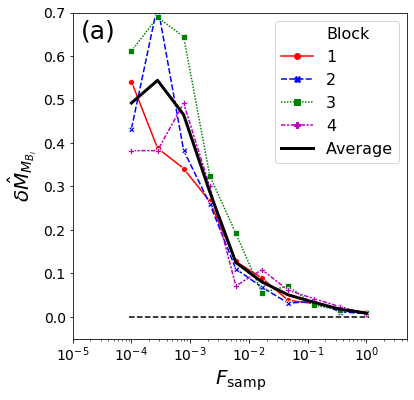

In [6]:
fig,ax = plt.subplots(figsize=(6,6))

pal = sns.color_palette(['r','b','g','m'],4)

sns.lineplot(data=data,x='sample_frac',y='diff_from_full_samp',hue='Block',style='Block',palette=pal,ci=None,markers=True, )

sample_fracs = list(av_across_blocks['sample_frac'])
average_deviation = list(av_across_blocks['diff_from_full_samp'])
plt.plot(sample_fracs,average_deviation,'k',label='Average',lw=3.0)

plt.xscale('log')
plt.xlim(0.1*min(s_frac_vals),5.0*max(s_frac_vals))
plt.plot([0.9*min(s_frac_vals),1.1*max(s_frac_vals)],[0,0],'k--')
plt.ylim(-0.05,0.7)

plt.ylabel("$ \delta \hat{M}_{B_i} $",fontsize=20)
plt.xlabel("$F_{\mathrm{samp}}$",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16)

plt.text(1.4*1E-5,0.64,'(a)',fontsize=25)

plt.savefig("Plots/snapshot_mag_eval.jpg",bbox_inches='tight')

## Control evaluation as a function of snapshot fraction

In [7]:
eval_data=pd.read_csv("Data/snapshot_as_sampfrac_data_grad_1-0_v2.csv")
eval_data.head()

,Unnamed: 0,control,magnetisation,mag_se,beta_factor,gradient,samp_frac,snapshot_num
0,0,no con,-0.610197,0.000017,8.0,1.0,0.001,0.0
1,1,unif,-0.586741,0.000016,8.0,1.0,0.001,0.0
2,2,snapshot,-0.583488,0.000012,8.0,1.0,0.001,0.0
3,0,no con,-0.619872,0.000009,8.0,1.0,0.001,0.0
4,1,unif,-0.585560,0.000020,8.0,1.0,0.001,0.0


(-1, 5.5)

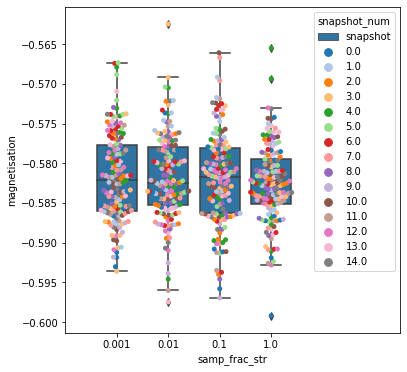

In [8]:
s_frac_vals = sorted(list(set(list(eval_data['samp_frac']))))

eval_data['samp_frac_str'] = [str(k) for k in list(eval_data['samp_frac'])]
snapshot_only = eval_data.loc[eval_data['control']=='snapshot']

plt.figure(figsize=(6,6))
sns.boxplot(data=snapshot_only,x='samp_frac_str',y='magnetisation',hue='control')
sns.swarmplot(data=snapshot_only,x='samp_frac_str',y='magnetisation',hue='snapshot_num',palette='tab20')

plt.xlim(-1,5.5)

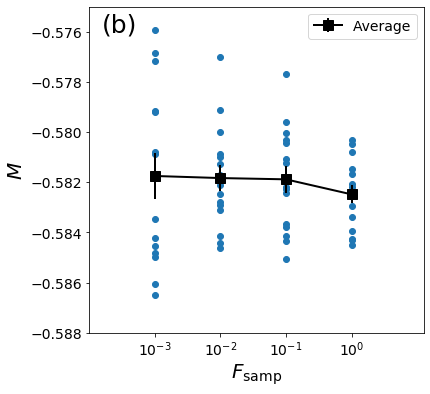

In [9]:
aggeg_to_snap = snapshot_only.groupby(['samp_frac','samp_frac_str','snapshot_num']).agg({'magnetisation':np.mean}).reset_index()
agged_to_samp = aggeg_to_snap.groupby(['samp_frac','samp_frac_str']).agg({'magnetisation':[np.mean,np.std,stats.sem]}).reset_index()
agged_to_samp.columns = agged_to_samp.columns.map('_'.join)

map_to_ints={'0.001':0,'0.01':1,'0.1':2,'1.0':3}
aggeg_to_snap['x_loc'] = [ map_to_ints[k] for k in list(aggeg_to_snap['samp_frac_str'])]

fig,ax=plt.subplots(figsize=(6,6))
#sns.stripplot(data=aggeg_to_snap,x='samp_frac_str',y='magnetisation')
ax.scatter(list(aggeg_to_snap['x_loc']),list(aggeg_to_snap['magnetisation']))

mag_sems = list(agged_to_samp['magnetisation_sem'])
mag_vals = list(agged_to_samp['magnetisation_mean'])
std_vals = list(agged_to_samp['magnetisation_std'])
plt.errorbar([0,1,2,3],mag_vals,yerr=mag_sems,fmt='ks-',label='Average',lw=2,markersize=10)


ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'])
plt.xlim(-1,4.1)
plt.ylim(-0.588,-0.575)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$F_{\mathrm{samp}}$",fontsize=20)
plt.ylabel("$M$",fontsize=20)
plt.legend(loc='upper right',fontsize=14)

plt.text(-0.8,-0.576,'(b)',fontsize=25)
plt.savefig("Plots/snapshot_consistency.jpg",bbox_inches='tight')